In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('py/') 

from functions import initialize, get_points_within_target_region, df2gdf, plot_map
from preprocess import preprocess_data
from map_matching import map_match_csv2gpx, map_match_csv2gpx_multithread
from generate_route_by_pyroutelib import generate_osm_routes_main
from config import max_threads


#### Initialize system:
- remove old data
- create necessary directories

In [2]:
initialize()

Cleaning dirs: input/ and output/ 


#### Remove input points outside of target boundary

- ananymize ap_id column
- clip points within boundary

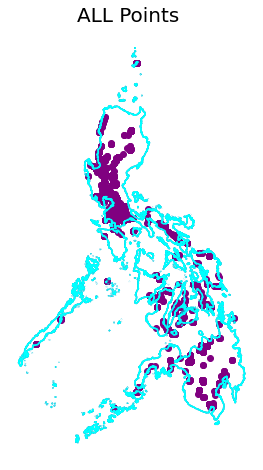

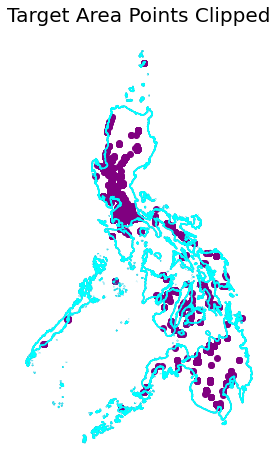

In [3]:
#gps_csv = '/home/bidur/0_a_map_match_gps_data/raw_data/PHL_20000.csv'#'/home/bidur/map_match_gps_data/raw_data/3368.csv'
gps_csv = '/home/bidur/0_a_map_match_gps_data/raw_data/PHL_10000.csv'
#gps_csv = '/home/bidur/0_a_map_match_gps_data/raw_data/PHL_20190703_anonymized.csv'
#gps_csv = 'raw_data/3368.csv'
gdf_probe_clipped, gdf_target = get_points_within_target_region (gps_csv, anonymize=True, display_plot = True)
#gdf_probe_clipped.head()

#### Preprocess input points

In [4]:
# 1. cleaning data & applying sampling
df_sample = preprocess_data()
df_sample.head(2)

,ap_id,timestamp,latitude,longitude
36,5254,2019-07-03 15:21:30,13.149553,123.714599
38,5254,2019-07-03 14:21:30,13.149553,123.714599


In [5]:
#df_sample.drop_duplicates(['ap_id'])

## apply thread

### map matching with osm roads using graphhopper

In [6]:
# map matching
#df_mapped_route = map_match_csv2gpx(df_sample)
df_mapped_route = None 
if max_threads > 1:
    df_mapped_route = map_match_csv2gpx_multithread(df_sample)
else:
    df_mapped_route = map_match_csv2gpx(df_sample)



completed:  java -jar matching-web/target/graphhopper-map-matching-web-1.0-SNAPSHOT.jar import map-data/philippines-latest.osm.pbf
<< multithreaded_process() -> START 2020-11-03 22:17:57.286409
0  slice_start:  0 slice_end:  77
thread : 1  slice_start:  77 slice_end:  0
 154
thread :  1
Very Few Data (<10 points) in <<  51  >> ap_ids
26  csv file prepared and saved in  /home/bidur/0_a_map_match_gps_data/input/csv/1
Very Few Data (<10 points) in <<  41  >> ap_ids
36  csv file prepared and saved in  /home/bidur/0_a_map_match_gps_data/input/csv/0
Current Working Directory  /home/bidur/0_a_map_match_gps_data/map-matching-master
GPX_DIR:  /home/bidur/0_a_map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/1
Current Working Directory  /home/bidur/0_a_map_match_gps_data/map-matching-master
GPX_DIR:  /home/bidur/0_a_map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/0

 Thread #1 completed:  java -jar matching-web/target/graphhopper-map-mat

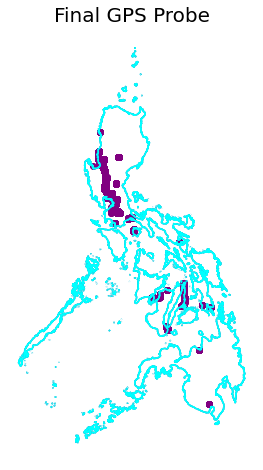

In [7]:
gdf_mapped = df2gdf(df_mapped_route)
plot_map(gdf_mapped, gdf_target, "Final GPS Probe") 